In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_avg_reward(df, num_avg = 50):
    avg_rewards = [df['reward'].values[0]]
    episodes = [df['episode'].values[0]]

    for i in range(int(len(df)/num_avg)):
        episodes.append(df[(i+1)*num_avg-1:(i+1)*num_avg]['episode'].values[0]+1)
        avg_rewards.append(df[i*num_avg:(i+1)*num_avg].mean()[1])

    return pd.DataFrame({'reward':avg_rewards, 'episode': episodes})

In [3]:
def draw_plot(df_path, num=50):
    df = pd.read_csv(df_path)
    draw_df = get_avg_reward(df, num)
    plt.xlabel('Training Episodes')
    plt.ylabel('Average Reward per Episode')
    plt.title(df_path.split('/')[-1].split('.')[0])
    plt.plot(draw_df['episode'],draw_df['reward'],color="green")
    plt.show()

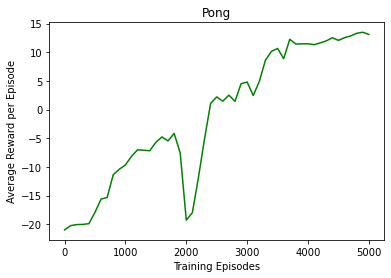

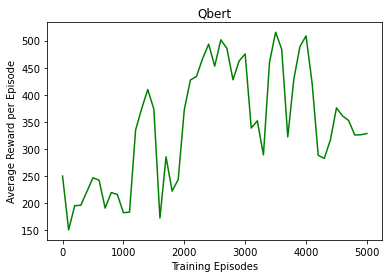

In [ ]:
first_exp_list = ['./results/Pong.csv', 'results/Qbert.csv', 'results/Breakout.csv', 'results/S_Invaders.csv']
for path in first_exp_list:
    draw_plot(path,100)